In [3]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as pat
from scipy import signal
path = '/home/mullah/Downloads/mperf'
participants = os.listdir(path)
left_right = ['left_final_data_decoded.csv', 'right_final_data_decoded.csv']
data_col = []
total_segments = 0
total_duration = 0
annotated = 0
participants_col = []
duration_col = []
test_col = []
window_col_good = []
for participant in participants:
    file_list = os.listdir(path+'/'+participant)
    for file in file_list:
        final_path = path+'/'+participant+'/'+file+'/'
        files = os.listdir(final_path)
        for r in range(2):
            try:
                data = pickle.load(open(final_path+str(r)+'event.p','rb'))
#                 ppg_data = pd.read_csv(final_path+left_right[r],compression='gzip',sep=',',header=None).values
                participants_col.append(participant)
                data = data[data[:,0].argsort()]
                total_segments+=data.shape[0]
                annotated+=(data[-1,1] - data[0,0])/3600000
                for a in data:
                    if (a[1]-a[0])/1000>1:
                        total_duration +=(a[1]-a[0])/3600000
                        duration_col.append((a[1]-a[0])/1000)
                    # index = np.where((ppg_data[:,0]>=a[0])&(ppg_data[:,0]<=a[1]))[0]
                    # window_col_good.append(ppg_data[index,:])
                    # plt.plot(ppg_data[index,4])
                    # plt.show()
#                 ts_array = np.arange(ppg_data[0,0],ppg_data[0,0]+3600*1000,.5*60*1000)
#                 data_labelled = []
#                 for i,t in enumerate(ts_array[:-1]):
#                     index = np.where((ppg_data[:,0]>=t)&(ppg_data[:,0]<t+1*60*1000))[0]
#                     if len(index) < .66*25*1*60:
#                         continue
#                     ppg_window = ppg_data[index,:]
#                     upper_envelope = np.abs(signal.hilbert(ppg_window[:,4]))
#                 #     upper_envelope = upper_envelope -np.mean(upper_envelope)
#                 #     test_col.append(np.std(upper_envelope))
#                     plt.figure(figsize=(16,8))
#                     plt.plot(ppg_window[:,0],ppg_window[:,4],label='PPG',linewidth=2,color='b')
#                     # plt.plot(ppg_window[:,0],upper_envelope,label='Upper Envelope',linewidth=2,color='r')
#                     ax = plt.gca()
#                     # # ax.set_title('oh no')
#                     rect_col = []
#                     count = 1
#                     for a in data:
#                         if ppg_window[0,0]<a[0]<ppg_window[-1,0] and ppg_window[0,0]<a[1]<ppg_window[-1,0]:
#                             rect = pat.Rectangle((a[0],-1),a[1]-a[0],2,facecolor='g',alpha=.6,label='Annotated Segment '+str(count))
#                             count+=1
#                             # rect_col.append(rect)
#                             ax.add_patch(rect)
#                     plt.ylim([-1.5,1.5])
#                     plt.xticks([ppg_window[p,0] for p in range(0,len(ppg_window[:,0]),100)],
#                                [int(np.round((ppg_window[p,0]-ppg_window[0,0])/(1000))) for p in range(0,len(ppg_window[:,0]),100)],
#                                fontsize=18,weight='bold')
#                     plt.xlabel('Seconds',fontsize=20,weight='bold')
#                     # plt.ylabel('Bandpass Filtered PPG',fontsize=20)
#                     plt.yticks([])
#                     plt.legend(ncol=3,loc='upper right',fontsize=18)
#                     plt.savefig('./images/'+str(t)+'.pdf',dps=1000)
#                     plt.close('all')
#                     plt.show()
            except Exception as e:
                print(e)
                a=1

[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180111/0event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180111/1event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180102/0event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180102/1event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180116/0event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180116/1event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180117/0event.p'
[Errno 2] No such file or directory: '/home/mullah/Downloads/mperf/879233b3-262c-4b19-a344-f4d595d08d26/20180117/1event.p'
[Errno 2] No suc

563 2.527471250678169 28.79472653055826 5


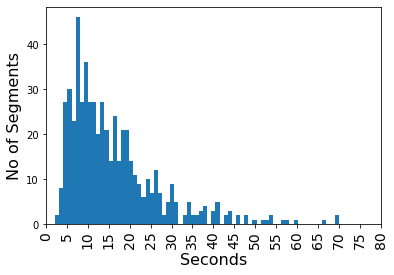

In [16]:
print(total_segments,total_duration,annotated,len(np.unique(participants_col)))
plt.figure()
plt.hist(duration_col,bins=100)
plt.ylabel('No of Segments',fontsize=16,weight=300)
plt.xlabel('Seconds',fontsize=16,weight=300)
plt.xticks([int(i) for i in range(0,int(max(duration_col)),5)],[str(i) for i in range(0,int(max(duration_col)),5)],
           fontsize=14,rotation='vertical',weight=300)
plt.yticks(weight=300)
plt.xlim([0,80])
# plt.savefig('./images/'+str('distribution')+'.pdf',dps=1000)
plt.show()
#
# import pickle
# pickle.dump(window_col_good,open('./data_saved/window_col_good.p','wb'))

# print(np.mean(duration_col))
# import scipy
# # print(scipy.stats.kstest(test_col,'norm'))
# plt.hist(test_col)
# plt.show()

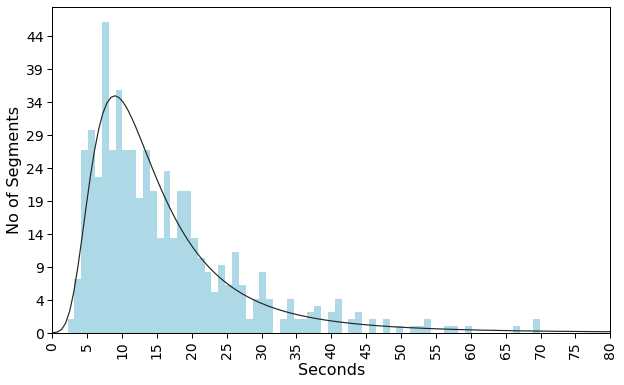

In [115]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import seaborn as sns
sns.set_context("paper")
sns.set_palette("pastel")
y, x = np.histogram(duration_col, bins=100, density=True)
# size = len(duration_col)
# # # x = scipy.arange(size)
# # # y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
# # h = plt.hist(duration_col, bins=range(100),normed=True)
# from scipy.stats import genextreme
# y1 = genextreme.pdf(y,.31181 , 10.5235,6.01504)
# print(len(y1))
# # dist_names = ['genextreme']

# # for dist_name in dist_names:
# #     dist = getattr(scipy.stats, dist_name)
# #     param = dist.fit(y)
# #     print(param)
# #     pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size 
# #     plt.plot(pdf_fitted, label=dist_name)
# # #     plt.xlim(0,47)
# # plt.legend(loc='upper right')
# # plt.show()
# # plt.plot(y1)
# plt.plot(y)
# plt.show()
plt.figure(figsize=(10,6))
ax = sns.distplot(duration_col,bins=100,hist=False,kde=False, fit=scipy.stats.genextreme)
plt.hist(duration_col,bins=100,density=True,color='lightblue')
plt.xlim([0,80])
plt.ylabel('No of Segments',fontsize=16,weight=300)
plt.xlabel('Seconds',fontsize=16,weight=300)
plt.xticks([int(i) for i in range(0,int(max(duration_col)),5)],[str(i) for i in range(0,int(max(duration_col)),5)],
           fontsize=14,rotation='vertical',weight=300)
plt.yticks(np.linspace(0,.08,10),np.int64(np.linspace(0,.08,10)*len(duration_col)),fontsize=14,weight=300)
plt.savefig('./images/'+str('distribution')+'.pdf',dps=1000)
plt.xlim([0,80])
plt.show()
# plt.legend(fontsize=16)
# plt.yticks(weight=300)

In [27]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ['gamma', 'beta', 'rayleigh', 'norm', "exponweib", "weibull_max", "weibull_min"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [28]:
get_best_distribution(duration_col)

p value for gamma = 0.4011626514297824
p value for beta = 0.05810268553087766
p value for rayleigh = 1.7377043441920906e-09
p value for norm = 7.03779453469495e-09
p value for exponweib = 3.5844521749581487e-196


/home/mullah/anaconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/mullah/anaconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for weibull_max = 0.0
p value for weibull_min = 0.15473318412722495
Best fitting distribution: gamma
Best p value: 0.4011626514297824
Parameters for the best fit: (1.842406337200289, 2.132976254426013, 7.676998552801665)


('gamma',
 0.4011626514297824,
 (1.842406337200289, 2.132976254426013, 7.676998552801665))

In [33]:
from scipy.io import savemat
savemat('./data_saved/duration_col.mat',{'dur':duration_col})